# A tutorial on stochastic programming (Alexander Shapiro and Andy Philpott)

### 1) Introduction:  Example (Inventory model)

**1. Deterministic Linear Programming**

Suppose that a company has to decide an order quantity
$x$ of a certain product to satisfy demand d. The cost of ordering is $c > 0$ per unit. If the
demand $d$ is bigger than $x$, then a back order penalty of $b ≥ 0$ per unit is incurred. The cost
of this is equal to $b(d − x)$ if $d > x$, and is zero otherwise. On the other hand if $d < x$, then
a holding cost of $h(x − d) ≥ 0$ is incurred. The total cost is then
$$
G(x, d) = cx + b[d − x]_+ + h[x − d]_+,
$$

The nonnegativity constraint $x ≥ 0$ can be removed if a back order policy is allowed. The
objective function $G(x, d)$ can be rewritten as

$$
G(x, d) = \max{\{(c − b)x + bd,(c + h)x − hd\}}
$$

For a numerical instance suppose $c=1, b=1.5$, and $h=0.1$, then

$$
\begin{aligned}
G(x, d)  = \left\{\begin{matrix}
-0.5x + 1.5d & \text{if} \quad x \leq d& \\ 
1.1x - 0.1d & \text{if} \quad x \geq d & 
\end{matrix}\right.
\end{aligned}
$$

Let $d=50$. Then $G(x, 50)$ is the pointwise maximum of linear functions.

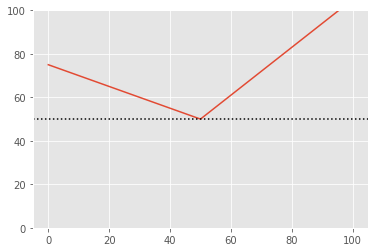

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
#
d = 50
x = np.linspace(0, 100, 1000)
#
def G_xd(x, d):
    g_x_d_1 = lambda x: - 0.5 * x + 1.5 * d
    g_x_d_2 = lambda x: 1.1 * x - 0.1 * d
    return np.maximum(g_x_d_1(x), g_x_d_2(x))
#
fig, ax = plt.subplots()
ax.plot(x, G_xd(x, d))
ax.set_ylim(0, 100)
ax.axhline(min(G_xd(x, d)), linestyle=":", c='k')

**2. Stochastic Linear Programming**

\begin{equation*}
\begin{aligned}[c]
\min_{x, t} \quad & J = t =G(x, d) \\
\text{s.t.: } \quad & t \geq (c-b)x + bd\\
& t \geq (c+h)x - hd\\
& x \geq 0
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
\min_{x, t_1, \cdots, t_k} \quad & J = \sum_{k=1}^{K}p_k t_k = \sum_{k=1}^{K}p_k G(x, d_k)\\
\text{s.t.: } \quad & t_k \geq (c-b)x + bd_k, \quad k=1, \cdots, K\\
& t_k \geq (c+h)x - hd_k, \quad k=1, \cdots, K\\
& x \geq 0
\end{aligned}
\end{equation*}

Suppose $c=1.0$, $b=1.5$ and $h=0.1$

*Scenario 01.* $D$ has a uniform distribution on the iterval $[0, 100]$.

\begin{aligned}
J &= \sum_{k=1}^{K}p_k G(x, d_k) \\
&= b\mathbb{E}[D] + (c-b)x + (b+h)\int_{0}^{x}F(z)dz \\
&= \frac{1.5}{2}(100+0) + (1.0 - 1.5)x + (1.5 + 0.1) \int_{0}^{x} \frac{x-0}{100-0} dx \\
&= 75 - 0.5x + \frac{1.6}{100} \frac{1}{2}x^2 \\
&= 75 - 0.5x + 0.008x^2
\end{aligned}

*Scenario 02.* $D$ is a finitely supported distribution with two equally likely scenarios $d_1=20$, $d_2=80$. or with three scenarios, $d_1=20$, $d_2=50$, $d_3=80$ with respective probabilites, $\frac{2}{5}, \frac{1}{5}, \frac{2}{5}$

$$
J = \frac{1}{2}G(x, 20) +  \frac{1}{2}G(x, 80) \quad \text{or} \quad J = \frac{2}{5}G(x, 20) + \frac{1}{5}G(x, 50) + \frac{2}{5}G(x, 80) 
$$

This illustrates how **more scenarios in general yield a better approximation to the objective function** (although in this case this has not made the
approximate solution any better). The plot for three scenarios also illustrates the fact that
if the scenarios are based on conditional expectations of $D$ over respective intervals $[0, 40]$,
$(40, 60]$, and $(60, 100]$ (with corresponding probabilities) and $G(x, D)$ is convex in $D$, then
the **approximation gives a lower bounding approximation to $E[G(x, D)]$ by virtue of Jensen’s
inequality**. 

minimum point : x = 31.231231231231234, J(x) = 67.18750281813345


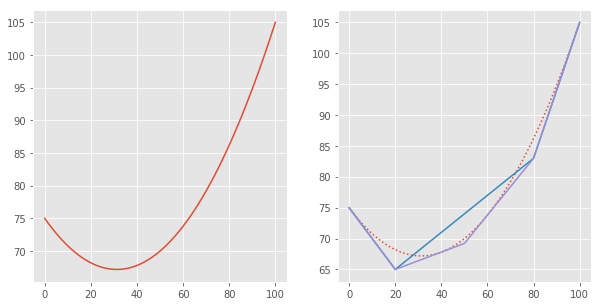

In [38]:
x = np.linspace(0, 100, 1000)
J0 = lambda x : 75 - 0.5 * x + 0.008 * x**2
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x, J0(x))
print("minimum point : x = {}, J(x) = {}".format(x[np.argmin(J(x))], min(J(x))))
J1 = lambda x: 0.5 * G_xd(x, d=20) + 0.5 * G_xd(x, d=80)
J2 = lambda x: (2/5) * G_xd(x, d=20) + (1/5) * G_xd(x, d=50) + (2/5) * G_xd(x, d=80)
axes[1].plot(x, J0(x), ':')
axes[1].plot(x, J1(x))
axes[1].plot(x, J2(x))

### 2). Two-stage stochasitc programming

**Motivation:** Optimal decisions should be based on data available at the time the decisions are made and should
not depend on future observations.

**Classical two-stage linear stochastic programming**


\begin{aligned}
\min_{x\in X} & \quad \{ g(x) := c^Tx + \mathbb{E}[Q(x, \xi) ] \}\\
\text{where} & \quad \mathbb{E}[Q(x, \xi)] = \sum_{k=1}^{K}p_k Q(x, \xi_k)
\end{aligned}

where $Q(x, \xi)$ is the optimal value of the second-stage problem

\begin{aligned}
\min_y & \quad q^Ty \\ 
\text{s.t.:} & \quad Tx + Wy \leq h 
\end{aligned}

Here $x\in \mathbb{R}^n$ is the first-stage decision vector, $y\in \mathbb{R}^n$ is the second-stage decision vector and $\xi = (q, T, W, h)$ contains the data of the second-stage problem.  

However, to make the second-state has feasiable solution, we reformulate it as

\begin{aligned}
\min_{y, t} & \quad q^Ty + \gamma t \\ 
\text{s.t.:} & \quad Tx + Wy - te \leq h \\
& t \geq 0
\end{aligned}


The two-stage problem can be formulated as one large linear programming problem:

\begin{aligned}
\min_{x\in X} & \quad c^Tx + \sum_{k=1}^{K}q_k^Ty_k\\
\text{s.t.:} & \quad x\in X, T_kx + W_k y_k \leq h_k, \quad k=1, \cdots, K.
\end{aligned}


**Example 2 (Inventory model)** Recall the inventory model with $K$ scenarios. This can be written as, 

\begin{aligned}
\min_{x, t_1, \cdots, t_k} & \quad 0x + \sum_{k=1}^{K}p_k t_k \\
\text{s.t.:} & \quad (c-b)x - t_k \leq -bd_k,\quad  k=1, \cdots, K, \\
& \quad (c+h)x - t_k \leq hd_k,\quad  k=1, \cdots, K, \\
& \quad x \geq 0
\end{aligned}


### 3) Monte Carlo techniques 

*sample average approximation* (SAA)
\begin{equation*}
\begin{aligned}[c]
\min_{x\in X} & \quad \{ g(x) := c^Tx + \mathbb{E}[Q(x, \xi) ] \}\\
\text{where} & \quad \mathbb{E}[Q(x, \xi)] = \sum_{k=1}^{K}p_k Q(x, \xi_k)
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
\min_{x\in X} & \quad \{ \hat{g}_N(x) := c^Tx + \frac{1}{N} \sum_{j=1}^{N} Q(x, \xi^j) \}\\
\end{aligned}
\end{equation*}

**Example 3 (Inventory model continued)** We illustrate the SAA methodon the instance of the inventory example, Recall that

\begin{aligned}
G(x, D)  = \left\{\begin{matrix}
-0.5x + 1.5D & \text{if} \quad x \leq D& \\ 
1.1x - 0.1D & \text{if} \quad x \geq D & 
\end{matrix}\right.
\end{aligned}

where $D$ has a uniform distribution on $[0, 100]$. We now show SAA approximations for three random samples, two with $N=5$, and one with $N = 10$. These samples were randomly generated from the uniform $[0, 100]$ distribution.

[ 3.70067199 32.22425526 47.06009028 71.75551572 85.87053961] 
 [1.01910898e-02 3.34052237e+01 4.97243988e+01 6.61201399e+01
 7.65467636e+01] 
 [12.89190953 29.22998839 40.33644685 59.89259653 61.89643628 63.86881122
 83.67306277 88.76691679 93.83341841 96.92322312]


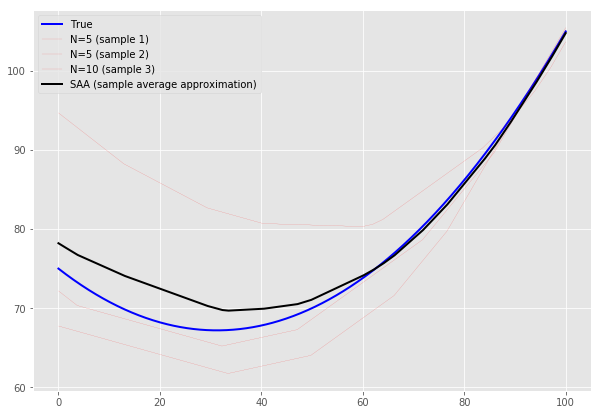

In [67]:
d_1 = np.sort(np.random.uniform(0, 100, 5))
d_2 = np.sort(np.random.uniform(0, 100, 5))
d_3 = np.sort(np.random.uniform(0, 100, 10))
x = np.linspace(0, 100, 1000)
J0 = lambda x : 75 - 0.5 * x + 0.008 * x**2
J1 = lambda x: np.mean([G_xd(x, d) for d in d_1], axis=0)
J2 = lambda x: np.mean([G_xd(x, d) for d in d_2], axis=0)
J3 = lambda x: np.mean([G_xd(x, d) for d in d_3], axis=0)
J = lambda x: (J1(x) + J2(x) + J3(x)) / 3
print(d_1, '\n', d_2, '\n', d_3)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, J0(x), label='True', color='b', linewidth=2)
ax.plot(x, J1(x), label='N=5 (sample 1)', color='r', linewidth=0.1)
ax.plot(x, J2(x), label='N=5 (sample 2)', color='r', linewidth=0.1)
ax.plot(x, J3(x), label='N=10 (sample 3)',color='r', linewidth=0.1)
ax.plot(x, J(x), color='k', linewidth=2, label='SAA (sample average approximation)')
ax.legend()

### 4) Evaluating candidate solutions